In [2]:
# data handling
import pandas as pd
import numpy as np

# data vis
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# import machine learning stuff
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing as pre
from sklearn import metrics

In [3]:
# Set-up default visualization parameters:
context_dict = {
    'axes.titlesize':18,
    'axes.labelsize':16,
}

mpl.rcParams['figure.figsize'] = (12, 8)
sns.set_context("paper", rc=context_dict)
sns.set_style("whitegrid")

In [4]:
train_df = pd.read_csv('data/train.csv', index_col='PassengerId')
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# Round 1: Minimal Features
Let's see what we get out of a Logistic Regression model with just the most obvious features included. 

In [5]:
X = train_df.drop(['Survived'], axis = 1)
Y = train_df.Survived

In [6]:
# Convert categorical data to numbers and standardize continuous data:
cat = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
cont = ['Age', 'Fare']

#categorical
train_df['Pclass'], int2class_pclass = pd.factorize(train_df['Pclass'])
train_df['Sex'], int2class_sex = pd.factorize(train_df['Sex'])
train_df['Embarked'], int2class_emb = pd.factorize(train_df['Embarked'])
train_df['SibSp'], int2class = pd.factorize(train_df['SibSp'])
train_df['Parch'], int2class = pd.factorize(train_df['Parch'])

#continuous
train_df[cont] = pre.scale(train_df[cont], copy=False)

train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,0,"Braund, Mr. Owen Harris",0,-0.530377,0,0,A/5 21171,-0.502445,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.571831,0,0,PC 17599,0.786845,C85,1
3,1,0,"Heikkinen, Miss. Laina",1,-0.254825,1,0,STON/O2. 3101282,-0.488854,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.365167,0,0,113803,0.420730,C123,0
5,0,0,"Allen, Mr. William Henry",0,0.365167,1,0,373450,-0.486337,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,-0.185937,1,0,211536,-0.386671,NaN,0
888,1,1,"Graham, Miss. Margaret Edith",1,-0.737041,1,0,112053,-0.044381,B42,0
889,0,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,0,2,W./C. 6607,-0.176263,NaN,0


In [7]:
# Check for missing data:
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,0,"Braund, Mr. Owen Harris",0,-0.530377,0,0,A/5 21171,-0.502445,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.571831,0,0,PC 17599,0.786845,C85,1
3,1,0,"Heikkinen, Miss. Laina",1,-0.254825,1,0,STON/O2. 3101282,-0.488854,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.365167,0,0,113803,0.420730,C123,0
5,0,0,"Allen, Mr. William Henry",0,0.365167,1,0,373450,-0.486337,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,-0.185937,1,0,211536,-0.386671,NaN,0
888,1,1,"Graham, Miss. Margaret Edith",1,-0.737041,1,0,112053,-0.044381,B42,0
889,0,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,0,2,W./C. 6607,-0.176263,NaN,0


In [8]:
# Looks like there is some missing data. Let's fill it in with the average:
train_df.loc[train_df.Age.isnull(), 'Age'] = train_df.Age.mean()

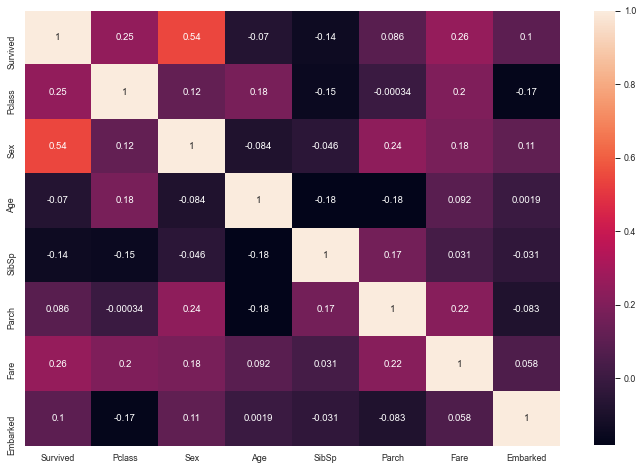

In [9]:
# let's take a look at the correlation matrix as a heatmap. Very handy:
sns.heatmap(train_df.corr(), annot=True)

In [10]:
#Split data into train/validate/test:
np.random.seed(333)

X = train_df.drop(['Survived'], axis=1)
Y = train_df.Survived

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train, test_size=0.2)

# drop categories we don't want for round 1:
x_train = x_train.drop(['Embarked', 'Name', 'Ticket', 'Cabin'], axis=1)
x_valid = x_valid.drop(['Embarked', 'Name', 'Ticket', 'Cabin'], axis=1)

x_train.sort_values(by='PassengerId').head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,0,-5.303766e-01,0,0,-0.502445
2,1,1,5.718310e-01,0,0,0.786845
3,0,1,-2.548247e-01,1,0,-0.488854
5,0,0,3.651671e-01,1,0,-0.486337
7,1,0,1.674039e+00,1,0,0.395814
11,0,1,-1.770360e+00,0,1,-0.312172
12,1,1,1.949591e+00,1,0,-0.113846
14,0,0,6.407190e-01,0,3,-0.018709
15,0,1,-1.081480e+00,1,0,-0.490280


### A couple of helper functions:

We are going to write a couple of functions that will help us collect and nicely print performance metrics of our various iterations. Then we will evaluate our models round 1 performance, and add it to a dictionary for later comparison to other attempts.

In [11]:
# A function for tracking the performance of different models:
def evaluate(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_valid)
    eval_dict = metrics.classification_report(y_valid, y_pred, 
                                              labels=[0,1], 
                                              target_names=['Died', 'Survived'],
                                              output_dict=True)
    prob_array = model.predict_proba(x_valid)
    
    fpr, tpr, huh = metrics.roc_curve(y_valid, model.predict_proba(x_valid)[:,1])
    auc = metrics.auc(fpr, tpr)
    eval_dict['AUC'] = auc
    eval_dict['Classifier'] = model
    
    return eval_dict

# a function to pretty print our dictionary of metrics:
def pprint(web, level=0):
    for k,v in web.items():
        if isinstance(v, dict):
            print('\t'*level, f'{k}: ')
            level += 1
            pprint(v, level)
            level -= 1
        else:
            print('\t'*level, k, ": ", v)

In [12]:
models = {}
models['Logistic Regression 1'] = evaluate(linear_model.LogisticRegression())
models['Logistic Regression 1']['Notes'] = \
" Minimal Features. No resampling to address class imbalance. No hyper-parameter tuning."

In [13]:
pprint(models)

 Logistic Regression 1: 
	 Died: 
		 precision :  0.8085106382978723
		 recall :  0.8636363636363636
		 f1-score :  0.8351648351648351
		 support :  88
	 Survived: 
		 precision :  0.7551020408163265
		 recall :  0.6727272727272727
		 f1-score :  0.7115384615384616
		 support :  55
	 accuracy :  0.7902097902097902
	 macro avg: 
		 precision :  0.7818063395570993
		 recall :  0.7681818181818182
		 f1-score :  0.7733516483516483
		 support :  143
	 weighted avg: 
		 precision :  0.7879688700357393
		 recall :  0.7902097902097902
		 f1-score :  0.7876162299239222
		 support :  143
	 AUC :  0.8022727272727272
	 Classifier :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
	 Notes :   Minimal Features. No resampling t

## Round 1 Performance:

In our first round,here are the scores of our major metrics:

    accuracy :  0.7902097902097902
    macro avg: 
         precision :  0.7818063395570993
         recall :  0.7681818181818182
         f1-score :  0.7733516483516483